---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [1]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [2]:
data = pd.read_csv('./AB_NYC_2019.csv')

### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [3]:
print(data.columns)
print(data.shape)
print(data.count())
print(data.info())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
(48895, 16)
id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64
<class 'pandas.core.fra

### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [5]:
data = data[pd.notnull(data.name) & pd.notnull(data.host_name)]

In [6]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
data.shape

(48858, 16)

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [8]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

# 3번 문제
# newyorkcity = plt.imread('newyorkcity.png')
# plt.figure(figsize=(10,8))
# plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
# ax = plt.gca()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

In [9]:
visual_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.373229,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.680328,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
visual_data['price'].quantile(0.05)

40.0

In [11]:
visual_data['price'].describe()['25%']

69.0

In [12]:
visual_data['price'].describe()['50%']

106.0

In [13]:
visual_data['price'].describe()['75%']

175.0

In [14]:
visual_data['price'].quantile(0.95)

355.0

---
>- 리뷰
   - 잘해주셨습니다.
   - describe와 quantile 모두를 사용해 잘 풀어주셨네요!
   - describe의 경우 quantile에 대한 parameter 값을 주시면
   - 위의 백분위수를 모두 표현할 수 있습니다

### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링(->제거한) 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다.

In [15]:
# 수정 : 백분위 95% 초과 값 제거
# visual_data = visual_data[visual_data['price'] >= visual_data['price'].quantile(0.95)]
visual_data = visual_data[visual_data['price'] <= visual_data['price'].quantile(0.95)]
visual_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [16]:
# scatter 그래프 Quiz6, 7 재사용 위해 함수로 작성
def show_price_scatter(ax):
    visual_data.plot.scatter(x='longitude', y='latitude', c='price' , cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8), ax=ax)
    plt.show()

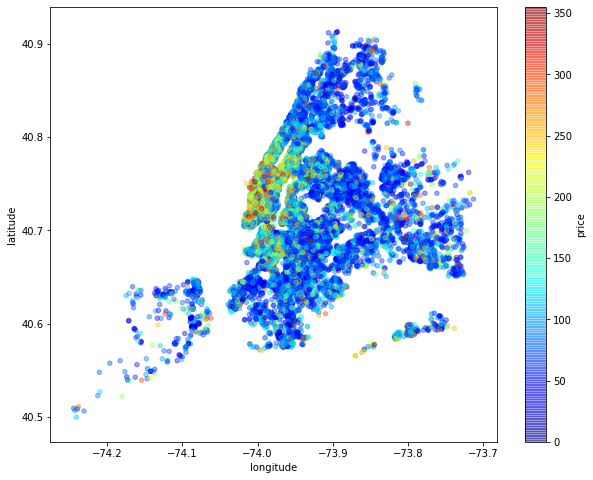

In [17]:
fig, ax = plt.subplots()
show_price_scatter(ax)

---
>- 리뷰
   - 이 부분은 문제를 잘못 이해하신 것 같습니다.
   - 백분위 95%보다 큰 값을 필터링 하라는 것이 그 값을 사용하라는 것은 아닙니다.
   - 95%이하인 값을 이용하라는 것입니다.

---
>- 2차 리뷰
   - 잘 해주셨습니다!
   - 조금 더 정확하게 한다면
   - 초과인 데이터를 필터링이므로 부호가 <이 아닌 <=이 되는 것이 조금 더 정확하겠네요 :)
   - 하지만 잘해주셨습니다!

### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

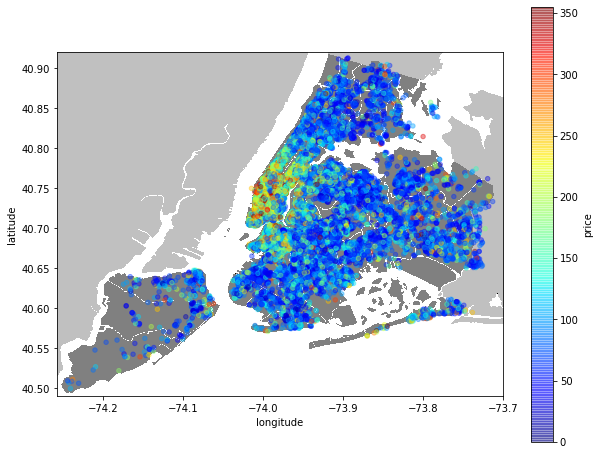

In [18]:
newyorkcity = plt.imread('./newyorkcity.png')
plt.figure(figsize=(10,8))
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
show_price_scatter(ax)

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [19]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import re
analysis_data = data

In [20]:
# # 4번 문제
import sqlite3
conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8]  re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터(->제거)합니다.

In [21]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
id                                48858 non-null int64
name                              48858 non-null object
host_id                           48858 non-null int64
host_name                         48858 non-null object
neighbourhood_group               48858 non-null object
neighbourhood                     48858 non-null object
latitude                          48858 non-null float64
longitude                         48858 non-null float64
room_type                         48858 non-null object
price                             48858 non-null int64
minimum_nights                    48858 non-null int64
number_of_reviews                 48858 non-null int64
last_review                       38821 non-null object
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    48858 non-null int64
availability_365                  48858 non-null int64

In [22]:
analysis_data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [23]:
## index 를 재설정 해주어야 아래 코드에서 error 발생 안함
#analysis_data = analysis_data.reset_index(drop=True)

## 아래와 같은 방법으로 name 데이터 제거시 속도가 느림
## TODO : Pandas 의 빠른 방법이 있는지 확인 필요
#name_re = re.compile(r'^[a-zA-Z0-9.,_# ]+$')
#for index, name in enumerate(analysis_data['name']):
#    if name_re.search(name) == None:
#        analysis_data.drop([index], axis=0, inplace=True)

In [24]:
# 수정 : 문제에서 '-' 를 '_' 으로 잘 못 보아 파싱 구문이 달라짐
#        str.match 사용
# name_re = re.compile(r'^[a-zA-Z0-9.,_# ]+$')
name_re = re.compile(r'^[a-zA-Z0-9.,#\-\s]+$')
analysis_data = analysis_data[analysis_data['name'].str.match(name_re)]
analysis_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


In [25]:
analysis_data.shape

(31739, 16)

---
>- 리뷰
   - 잘해주셨네요!
   - pandas로 수행하는 방법으로는 ~.str.match 혹은 ~.str.contains가 존재합니다.
   - analysis_data\['name'\]뒤에 걸어주신다면? 사용할 수 있을거에요

---
>- 2차 리뷰
   - compile 부분을 자세히 보니 빠진 부분이 좀 있네요
   - 공백을 체크하는 부분, ',' 부분이 빠져 있어요!
   - 필터링된 데이터수가 31739가 나와야 합니다.
   
>- 수정
   - 조건식 수정하여 31739 확인 하였습니다.

---
>- 3차 리뷰
   - 잘해주셨습니다.
   - 이제 완벽하게 regex가 적용되었네요

### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [26]:
# room_type의 모든 값
analysis_data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [27]:
analysis_data.groupby('room_type')['price'].max()

room_type
Entire home/apt    10000
Private room       10000
Shared room         1800
Name: price, dtype: int64

In [28]:
# room_type의 가장 높은 price 값
high_price_group = analysis_data.groupby('room_type').max()['price']
high_price_group

room_type
Entire home/apt    10000
Private room       10000
Shared room         1800
Name: price, dtype: int64

In [29]:
for room_type in analysis_data['room_type'].unique():
    group_type = analysis_data['room_type'] == room_type
    group_max_price = analysis_data['price'] == analysis_data.groupby('room_type').get_group(room_type).max()['price']
    print(analysis_data[group_type & group_max_price][['room_type', 'name', 'host_id', 'price']])

             room_type                                             name  \
17692  Entire home/apt  Luxury 1 bedroom apt. -stunning Manhattan views   
29238  Entire home/apt                              1-BR Lincoln Center   

        host_id  price  
17692   5143901  10000  
29238  72390391  10000  
         room_type                                 name   host_id  price
9151  Private room  Furnished room in Astoria apartment  20582832  10000
         room_type                                    name   host_id  price
14380  Shared room  Mins away to Manhattan Suite Residence  24146326   1800


---
>- 리뷰
   - 잘해주셨는데 위의 데이터 때문인지 결과는 맞지 않네요
   - Entire_home에서 2개가 나와야합니다

>- 수정
   - Quiz.8 문제에서 '-' 를 '_' 으로 잘 못 보아 파싱구문에 문제가 있어 수정 하였습니다.

---
>- 2차 리뷰
   - 잘해주셨습니다!
   - 전에는 오류가 나지 않았었던 것으로 기억하는데 저 부분에서 전 오류가 나네요..
   - 결과를 찍어주신 것을 보면 저한테만 생기는 오류 같네요!
   - 코드로 볼떄엔 문제 없습니다! 결과도 잘 나오네요

### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

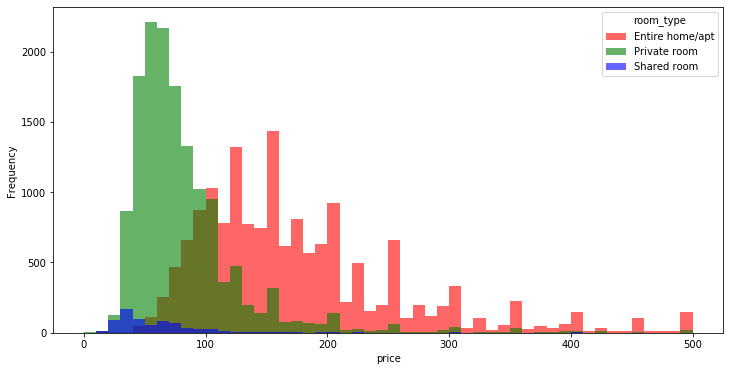

In [30]:
# room_type 별 hist 의 color 설정
color_type = {'Entire home/apt': 'r', 'Private room': 'g', 'Shared room': 'b'}

# room_type 별 hist 그리기
for room_type in color_type:
    analysis_data[analysis_data['room_type'] == room_type]['price'].plot.hist(bins=range(0, 501, 10), 
                                                                              color=color_type[room_type], 
                                                                              label=room_type, 
                                                                              alpha=0.6, 
                                                                              figsize=(12,6))
plt.legend(title = 'room_type')
plt.xlabel('price')
plt.show()

### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [31]:
# # 4번 문제
# import sqlite3
# conn = sqlite3.connect(':memory:')
# conn.text_factory = str
# analysis_data.to_sql(name='data', con=conn)
# 이 부분이 여기 있으면 안됩니다.
# 본래 위치인 quiz8 위에서 먼저 선언되어야 합니다.

In [32]:
sql_data = pd.read_sql('select * from data', conn)

In [33]:
print(sql_data.columns)
print(sql_data.shape)
print(sql_data.count())
print(sql_data.info())

Index(['index', 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
(48858, 17)
index                             48858
id                                48858
name                              48858
host_id                           48858
host_name                         48858
neighbourhood_group               48858
neighbourhood                     48858
latitude                          48858
longitude                         48858
room_type                         48858
price                             48858
minimum_nights                    48858
number_of_reviews                 48858
last_review                       38821
reviews_per_month                 38821
calculated_host_listings_count    48858
availability_365           

In [34]:
sql_data.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
sql_data.isnull().sum()

index                                 0
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
# 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id
top10_reg_ID = sql_data['host_id'].value_counts().sort_values(ascending=False)[:10]
top10_reg_ID

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [37]:
# 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id
top10_reg_ID = sql_data['host_id'].value_counts().sort_values(ascending=False)[:10]
top10_reg_ID
# 정답의 값은 이렇게 나와요!! 같은 코드이지만 다른 결과값

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [38]:
# host_id 로 groupby 하여 상위 10개의 host_id 의 price 평균 구하기
top10_reg_ID_mean_price = sql_data.groupby('host_id').mean()['price'].loc[top10_reg_ID.index]
top10_reg_ID_mean_price

219517861    253.195719
107434423    303.150862
30283594     277.528926
137358866     43.825243
12243051     213.031250
16098958     208.958333
61391963     146.241758
22541573     215.436782
200380610    290.230769
7503643      149.192308
Name: price, dtype: float64

In [39]:
# ID 별 count 값, 평균 가격
result = pd.DataFrame([top10_reg_ID, top10_reg_ID_mean_price], index=['count', 'mean of price'])
result = result.transpose()
result

,count,mean of price
219517861,327.0,253.195719
107434423,232.0,303.150862
30283594,121.0,277.528926
137358866,103.0,43.825243
12243051,96.0,213.031250
16098958,96.0,208.958333
61391963,91.0,146.241758
22541573,87.0,215.436782
200380610,65.0,290.230769
7503643,52.0,149.192308


---
>- 리뷰
   - 보여주실때 count 값도 같이 있었으면 좋았겠지만
   - 일단 위에서 나타내주시고 있기에 문제는 없을 것 같네요!
   - 코드 상으로 문제는 없어 보이는데
   - 위에서 데이터 필터링이 잘못되어 결과값이 다릅니다.
   - 꼭 다시 한번 해보시고 결과값을 비교해보시기 바랍니다.

>- 수정
   - Quiz.8 문제에서 '-' 를 '_' 으로 잘 못 보아 파싱구문에 문제가 있어 수정 하였습니다.

---
>- 2차 리뷰
   - 여기 있는 부분들도 위의 pattern이 제대로 잡히면
   - 제대로 답이 나올 것 같아요!

---
>- 3차 리뷰
   - 코드는 정상인데 결과 값이 안 맞아서 한참 봤네요..
   - 원래 있던 코드의 위치가 변하면서 데이터가 변해 그 결과값이 달랐던 거였습니다.
   - 코드를 본래 위치에 놓으니 잘 나오네요!
   - 수고하셨습니다.